# 14. 카메라 스티커앱을 개선하자

## 프로젝트 (1) moviepy로 비디오 처리하기


#### 1. moviepy를 이용해서  비디오를 읽고 쓰기

In [1]:
from moviepy.editor import VideoClip, VideoFileClip
from moviepy.editor import ipython_display
import cv2
import numpy as np
import os

In [2]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'   # 샘플로 제공된 video2.mp4
clip = VideoFileClip(video_path)  # moviepy로 읽기
clip = clip.resize(width=640)     # width=640으로 축소
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))  # 화면에 플레이

# 쓰기
result_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
clip.write_videofile(result_video_path)

t:   0%|          | 0/404 [00:00<?, ?it/s, now=None]                

Moviepy - Building video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4.
MoviePy - Writing audio in mvpyresultTEMP_MPY_wvf_snd.mp3
MoviePy - Done.
Moviepy - Writing video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4


#### 2. 동영상을 numpy 형태로 변환하고 영상 밝기를 50% 어둡게 만들기

In [3]:
# 읽기
video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/video2.mp4'
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)
clip.ipython_display(fps=30, loop=True, autoplay=True, rd_kwargs=dict(logger=None))

# clip 에서 numpy 로 데이터 추출
vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)
for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

# 새 clip 만들기
dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

# 쓰기
result_video_path2 = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult2.mp4'
outclip.write_videofile(result_video_path2, fps=30)

t:  12%|█▏        | 48/403 [00:00<00:00, 463.56it/s, now=None]

Moviepy - Building video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult2.mp4.
Moviepy - Writing video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult2.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult2.mp4


#### 3. 영상을 읽고 쓰는 시간 측정하기

In [4]:
# CASE 1 : moviepy 사용
start = cv2.getTickCount()
clip = VideoFileClip(video_path)
clip = clip.resize(width=640)

vlen = int(clip.duration*clip.fps)
video_container = np.zeros((vlen, clip.size[1], clip.size[0], 3), dtype=np.uint8)

for i in range(vlen):
    img = clip.get_frame(i/clip.fps)
    video_container[i] = (img * 0.5).astype(np.uint8)

dur = vlen / clip.fps
outclip = VideoClip(lambda t: video_container[int(round(t*clip.fps))], duration=dur)

mvpy_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/mvpyresult.mp4'
outclip.write_videofile(mvpy_video_path, fps=30)

time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] moviepy time : {time:.2f}ms')


t:  12%|█▏        | 48/403 [00:00<00:00, 462.20it/s, now=None]

Moviepy - Building video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4.
Moviepy - Writing video /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4



Moviepy - Done !
Moviepy - video ready /home/aiffel-d34j/aiffel/video_sticker_app/images/mvpyresult.mp4
[INFO] moviepy time : 3.18ms


In [5]:
# CASE 2 : OpenCV 사용
start = cv2.getTickCount()
vc = cv2.VideoCapture(video_path)

cv_video_path = os.getenv('HOME')+'/aiffel/video_sticker_app/images/cvresult.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
vw = cv2.VideoWriter(cv_video_path, fourcc, 30, (640,360))

vlen = int(vc.get(cv2.CAP_PROP_FRAME_COUNT))

for i in range(vlen):
    ret, img = vc.read()
    if ret == False: break
    
    img_result = cv2.resize(img, (640, 360)) * 0.5
    vw.write(img_result.astype(np.uint8))
    
time = (cv2.getTickCount() - start) / cv2.getTickFrequency()
print (f'[INFO] cv time : {time:.2f}ms')

[INFO] cv time : 1.48ms


#### 4. moviepy 를 이용할 때의 장단점 분석

* 동영상 파일의 읽고 쓰는 시간, 즉 재생시간 길이는 OpenCV가 moviepy보다 짧다.

* [MoviePy 특징](https://chacha95.github.io/2019-10-24-Movipy/)
  - 간단하며 직관적임
  - Flexible함
  - Protable함
  - numpy와의 호환성
  - stream video에 대한 작업엔 적합하지 않음
  - 비디오의 개수가 많을 경우(100개 이상) 적합하지 않음
  
  
* Moviepy 권장
  - 여러 비디오에 대해 처리할 때
  - 여러 비디오를 복잡한 방식으로 합칠 때
  - video effect를 추가하고 싶을 때(다른 video editor 없이)
  - 여러 이미지를 이용해 GIF를 만들고 싶을 때
  
  
* OpenCV 권장
  - frame-by-frame의 비디오 분석에 사용할 때
  - 단순히 비디오 파일을 이미지로 쪼개고 싶을 때 

## 14-3. 프로젝트 (2) 어디까지 만들고 싶은지 정의하기


### 1. 실시간 카메라 스티커앱 만들기

#### CASE 1 : 웹캠으로 입력하는 경우

In [42]:
# 동영상 기반 스티커앱 동작 확인
!cd ~/aiffel/video_sticker_app && python webcam_sticker.py

QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

Qt: Session management error: None of the authentication protocols specified are supported
QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

QObject::moveToThread: Current thread (0x559d5c4b1d20) is not the object's thread (0x559d60b7d1f0).
Cannot move to target thread (0x559d5c4b1d20)

QObject::moveToThread: Curr

-1
[INFO] time: 41.23ms
[INFO] time: 41.21ms
[INFO] time: 39.37ms
[INFO] time: 39.14ms
[INFO] time: 41.06ms
[INFO] time: 38.55ms
[INFO] time: 38.75ms
[INFO] time: 47.57ms
[INFO] time: 39.48ms
[INFO] time: 38.68ms
[INFO] time: 41.64ms
[INFO] time: 39.40ms
[INFO] time: 38.93ms
[INFO] time: 38.93ms
[INFO] time: 38.94ms
[INFO] time: 45.92ms
[INFO] time: 39.87ms
[INFO] time: 39.78ms
[INFO] time: 38.50ms
[INFO] time: 41.21ms
[INFO] time: 39.54ms
[INFO] time: 38.96ms
[INFO] time: 38.98ms
[INFO] time: 38.99ms
[INFO] time: 39.86ms
[INFO] time: 39.62ms
[INFO] time: 39.88ms
[INFO] time: 40.00ms
[INFO] time: 39.70ms
[INFO] time: 40.39ms
[INFO] time: 40.29ms
[INFO] time: 39.76ms
[INFO] time: 39.84ms
[INFO] time: 39.89ms
[INFO] time: 39.82ms
[INFO] time: 39.83ms
[INFO] time: 40.16ms
[INFO] time: 40.10ms
[INFO] time: 38.81ms
[INFO] time: 39.27ms
[INFO] time: 38.67ms
[INFO] time: 38.67ms
[INFO] time: 39.28ms
[INFO] time: 38.84ms
[INFO] time: 40.78ms
[INFO] time: 40.66ms
[INFO] time: 41.31ms
[INFO] tim

[INFO] time: 45.35ms
[INFO] time: 43.03ms
[INFO] time: 41.65ms
[INFO] time: 41.55ms
[INFO] time: 40.85ms
[INFO] time: 40.80ms
[INFO] time: 38.67ms
[INFO] time: 39.13ms
[INFO] time: 40.82ms
[INFO] time: 40.92ms
[INFO] time: 41.53ms
[INFO] time: 41.38ms
[INFO] time: 41.52ms
[INFO] time: 41.16ms
[INFO] time: 42.14ms
[INFO] time: 41.63ms
[INFO] time: 40.68ms
[INFO] time: 43.12ms
[INFO] time: 44.21ms
[INFO] time: 41.81ms
[INFO] time: 41.60ms
[INFO] time: 41.79ms
[INFO] time: 43.54ms
[INFO] time: 42.73ms
[INFO] time: 41.64ms
[INFO] time: 41.97ms
[INFO] time: 41.84ms
[INFO] time: 41.65ms
[INFO] time: 42.14ms
[INFO] time: 48.97ms
[INFO] time: 42.37ms
[INFO] time: 42.09ms
[INFO] time: 41.02ms
[INFO] time: 42.67ms
[INFO] time: 42.43ms
[INFO] time: 41.27ms
[INFO] time: 41.89ms
[INFO] time: 42.10ms
[INFO] time: 41.25ms
[INFO] time: 41.29ms
[INFO] time: 40.83ms
[INFO] time: 41.06ms
[INFO] time: 40.96ms
[INFO] time: 41.05ms
[INFO] time: 41.65ms
[INFO] time: 40.98ms
[INFO] time: 40.89ms
[INFO] time: 

[INFO] time: 38.73ms
[INFO] time: 38.65ms
[INFO] time: 38.52ms
[INFO] time: 38.81ms
[INFO] time: 38.70ms
[INFO] time: 38.63ms
[INFO] time: 39.62ms
[INFO] time: 39.81ms
[INFO] time: 39.38ms
[INFO] time: 42.29ms
[INFO] time: 39.82ms
[INFO] time: 39.34ms
[INFO] time: 45.27ms
[INFO] time: 39.97ms
[INFO] time: 41.57ms
[INFO] time: 45.74ms
[INFO] time: 42.14ms
[INFO] time: 41.39ms
[INFO] time: 41.38ms
[INFO] time: 52.78ms
[INFO] time: 42.12ms
[INFO] time: 41.62ms
[INFO] time: 42.18ms
[INFO] time: 43.63ms
[INFO] time: 40.76ms
[INFO] time: 40.12ms
[INFO] time: 39.17ms
[INFO] time: 40.23ms
[INFO] time: 39.67ms
[INFO] time: 41.98ms
[INFO] time: 42.35ms
[INFO] time: 47.35ms
[INFO] time: 41.42ms
[INFO] time: 39.24ms
[INFO] time: 40.90ms
[INFO] time: 40.82ms
[INFO] time: 41.97ms
[INFO] time: 42.03ms
[INFO] time: 44.60ms
[INFO] time: 42.70ms
[INFO] time: 42.06ms
[INFO] time: 42.35ms
[INFO] time: 43.22ms
[INFO] time: 41.25ms
[INFO] time: 41.07ms
[INFO] time: 41.15ms
[INFO] time: 41.51ms
[INFO] time: 

[INFO] time: 39.89ms
[INFO] time: 39.53ms
[INFO] time: 39.28ms
[INFO] time: 39.70ms
[INFO] time: 44.51ms
[INFO] time: 39.64ms
[INFO] time: 39.41ms
[INFO] time: 39.44ms
[INFO] time: 41.73ms
[INFO] time: 42.81ms
[INFO] time: 41.45ms
[INFO] time: 43.16ms
[INFO] time: 43.21ms
[INFO] time: 44.01ms
[INFO] time: 41.88ms
[INFO] time: 41.61ms
[INFO] time: 39.63ms
[INFO] time: 38.62ms
[INFO] time: 39.00ms
[INFO] time: 43.25ms
[INFO] time: 43.26ms
[INFO] time: 39.41ms
[INFO] time: 38.85ms
[INFO] time: 42.05ms
[INFO] time: 39.36ms
[INFO] time: 39.34ms
[INFO] time: 39.78ms
[INFO] time: 39.95ms
[INFO] time: 39.35ms
[INFO] time: 39.15ms
[INFO] time: 39.91ms
[INFO] time: 39.45ms
[INFO] time: 38.77ms
[INFO] time: 38.88ms
[INFO] time: 39.01ms
[INFO] time: 38.90ms
[INFO] time: 38.89ms
[INFO] time: 42.38ms
[INFO] time: 40.69ms
[INFO] time: 39.04ms
[INFO] time: 39.48ms
[INFO] time: 39.30ms
[INFO] time: 38.99ms
[INFO] time: 40.62ms
[INFO] time: 41.29ms
[INFO] time: 39.42ms
[INFO] time: 39.10ms
[INFO] time: 

[INFO] time: 38.84ms
[INFO] time: 38.75ms
[INFO] time: 42.49ms
[INFO] time: 40.94ms
[INFO] time: 41.06ms
[INFO] time: 41.30ms
[INFO] time: 41.96ms
[INFO] time: 40.91ms
[INFO] time: 41.27ms
[INFO] time: 42.37ms
[INFO] time: 41.00ms
[INFO] time: 40.34ms
[INFO] time: 38.52ms
[INFO] time: 41.84ms
[INFO] time: 39.40ms
[INFO] time: 40.79ms
[INFO] time: 41.17ms
[INFO] time: 42.96ms
[INFO] time: 42.62ms
[INFO] time: 42.37ms
[INFO] time: 40.06ms
[INFO] time: 44.20ms
[INFO] time: 40.62ms
[INFO] time: 41.34ms
[INFO] time: 41.89ms
[INFO] time: 48.78ms
[INFO] time: 43.64ms
[INFO] time: 45.70ms
[INFO] time: 43.46ms
[INFO] time: 44.41ms
[INFO] time: 43.52ms
[INFO] time: 43.26ms
[INFO] time: 44.66ms
[INFO] time: 40.44ms
[INFO] time: 41.14ms
[INFO] time: 38.85ms
[INFO] time: 40.94ms
[INFO] time: 42.91ms
[INFO] time: 40.43ms
[INFO] time: 40.88ms
[INFO] time: 38.82ms
[INFO] time: 38.67ms
[INFO] time: 38.79ms
[INFO] time: 39.02ms
[INFO] time: 41.36ms
[INFO] time: 40.24ms
[INFO] time: 43.44ms
[INFO] time: 

[INFO] time: 39.65ms
[INFO] time: 40.73ms
[INFO] time: 39.94ms
[INFO] time: 39.17ms
[INFO] time: 39.39ms
[INFO] time: 44.83ms
[INFO] time: 44.04ms
[INFO] time: 44.13ms
[INFO] time: 44.95ms
[INFO] time: 40.79ms
[INFO] time: 39.09ms
[INFO] time: 37.95ms
[INFO] time: 38.43ms
[INFO] time: 43.75ms
[INFO] time: 43.80ms
[INFO] time: 43.40ms
[INFO] time: 43.08ms
[INFO] time: 44.84ms
[INFO] time: 44.35ms
[INFO] time: 39.96ms
[INFO] time: 39.67ms
[INFO] time: 39.30ms
[INFO] time: 38.56ms
[INFO] time: 38.00ms
[INFO] time: 37.86ms
[INFO] time: 37.83ms
[INFO] time: 37.77ms
[INFO] time: 38.09ms
[INFO] time: 41.34ms
[INFO] time: 47.81ms
[INFO] time: 43.44ms
[INFO] time: 39.82ms
[INFO] time: 40.34ms
[INFO] time: 39.90ms
[INFO] time: 40.17ms
[INFO] time: 39.89ms
[INFO] time: 40.00ms
[INFO] time: 40.43ms
[INFO] time: 40.89ms
[INFO] time: 38.97ms
[INFO] time: 38.48ms
[INFO] time: 37.69ms
[INFO] time: 37.78ms
[INFO] time: 39.35ms
[INFO] time: 39.80ms
[INFO] time: 39.32ms
[INFO] time: 39.17ms
[INFO] time: 

[INFO] time: 42.41ms
[INFO] time: 41.20ms
[INFO] time: 41.12ms
[INFO] time: 41.63ms
[INFO] time: 41.50ms
[INFO] time: 41.33ms
[INFO] time: 41.68ms
[INFO] time: 42.36ms
[INFO] time: 43.25ms
[INFO] time: 42.26ms
[INFO] time: 42.58ms
[INFO] time: 41.67ms
[INFO] time: 41.97ms
[INFO] time: 41.15ms
[INFO] time: 41.66ms
[INFO] time: 41.27ms
[INFO] time: 42.05ms
[INFO] time: 42.33ms
[INFO] time: 42.75ms
[INFO] time: 41.21ms
[INFO] time: 41.00ms
[INFO] time: 41.93ms
[INFO] time: 40.99ms
[INFO] time: 40.98ms
[INFO] time: 41.27ms
[INFO] time: 42.92ms
[INFO] time: 41.87ms
[INFO] time: 41.48ms
[INFO] time: 41.16ms
[INFO] time: 41.90ms
[INFO] time: 41.95ms
[INFO] time: 41.86ms
[INFO] time: 42.18ms
[INFO] time: 41.99ms
[INFO] time: 41.67ms
[INFO] time: 42.86ms
[INFO] time: 41.81ms
[INFO] time: 42.15ms
[INFO] time: 42.93ms
[INFO] time: 42.21ms
[INFO] time: 41.41ms
[INFO] time: 41.07ms
[INFO] time: 43.12ms
[INFO] time: 41.36ms
[INFO] time: 40.70ms
[INFO] time: 41.06ms
[INFO] time: 41.38ms
[INFO] time: 

[INFO] time: 39.88ms
[INFO] time: 39.81ms
[INFO] time: 40.06ms
[INFO] time: 39.96ms
[INFO] time: 39.18ms
[INFO] time: 39.35ms
[INFO] time: 39.35ms
[INFO] time: 39.77ms
[INFO] time: 40.65ms
[INFO] time: 40.31ms
[INFO] time: 39.33ms
[INFO] time: 39.22ms
[INFO] time: 40.11ms
[INFO] time: 39.11ms
[INFO] time: 39.17ms
[INFO] time: 39.76ms
[INFO] time: 39.30ms
[INFO] time: 39.06ms
[INFO] time: 40.90ms
[INFO] time: 38.95ms
[INFO] time: 39.77ms
[INFO] time: 40.68ms
[INFO] time: 40.18ms
[INFO] time: 40.72ms
[INFO] time: 39.85ms
[INFO] time: 39.77ms
[INFO] time: 38.93ms
[INFO] time: 41.00ms
[INFO] time: 41.43ms
[INFO] time: 40.71ms
[INFO] time: 42.20ms
[INFO] time: 39.12ms
[INFO] time: 39.02ms
[INFO] time: 38.94ms
[INFO] time: 38.84ms
[INFO] time: 39.82ms
[INFO] time: 38.99ms
[INFO] time: 39.06ms
[INFO] time: 38.95ms
[INFO] time: 40.42ms
[INFO] time: 41.99ms
[INFO] time: 39.05ms
[INFO] time: 38.70ms
[INFO] time: 39.08ms
[INFO] time: 39.02ms
[INFO] time: 38.71ms
[INFO] time: 40.79ms
[INFO] time: 

[INFO] time: 39.55ms
[INFO] time: 39.76ms
[INFO] time: 40.62ms
[INFO] time: 38.94ms
[INFO] time: 39.36ms
[INFO] time: 39.63ms
[INFO] time: 38.72ms
[INFO] time: 39.89ms
[INFO] time: 39.12ms
[INFO] time: 39.89ms
[INFO] time: 39.30ms
[INFO] time: 39.32ms
[INFO] time: 39.20ms
[INFO] time: 39.15ms
[INFO] time: 39.64ms
[INFO] time: 39.99ms
[INFO] time: 39.86ms


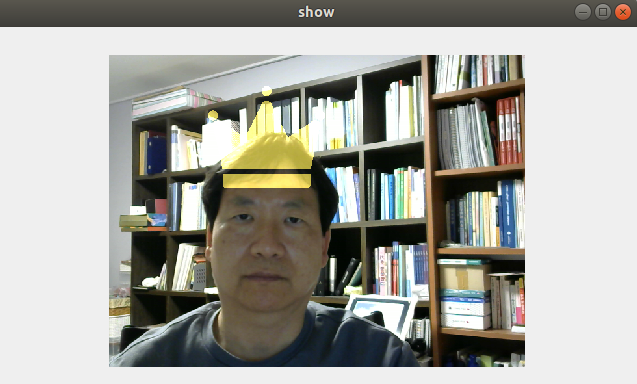


#### CASE 2 : 스마트폰 영상의 스트리밍으로 입력하는 경우

In [17]:
!cd ~/aiffel/video_sticker_app && python webcam_sticker.py

QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

Qt: Session management error: None of the authentication protocols specified are supported
QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

QObject::moveToThread: Current thread (0x561c4ad39d20) is not the object's thread (0x561c4f405070).
Cannot move to target thread (0x561c4ad39d20)

QObject::moveToThread: Curr

-9223372036854775808
[INFO] time: 42.49ms
[INFO] time: 40.67ms
[INFO] time: 40.39ms
[INFO] time: 40.40ms
[INFO] time: 44.09ms
[INFO] time: 52.11ms
[INFO] time: 39.32ms
[INFO] time: 39.90ms
[INFO] time: 39.57ms
[INFO] time: 40.68ms
[INFO] time: 40.30ms
[INFO] time: 39.96ms
[INFO] time: 39.79ms
[INFO] time: 39.49ms
[INFO] time: 40.49ms
[INFO] time: 40.57ms
[INFO] time: 40.97ms
[INFO] time: 40.81ms
[INFO] time: 40.97ms
[INFO] time: 39.79ms
[INFO] time: 40.22ms
[INFO] time: 41.79ms
[INFO] time: 41.29ms
[INFO] time: 41.67ms
[INFO] time: 39.62ms
[INFO] time: 39.42ms
[INFO] time: 39.71ms
[INFO] time: 39.57ms
[INFO] time: 39.58ms
[INFO] time: 39.57ms
[INFO] time: 39.72ms
[INFO] time: 39.78ms
[INFO] time: 39.81ms
[INFO] time: 39.67ms
[INFO] time: 39.89ms
[INFO] time: 39.62ms
[INFO] time: 39.60ms
[INFO] time: 39.74ms
[INFO] time: 39.71ms
[INFO] time: 39.23ms
[INFO] time: 39.27ms
[INFO] time: 39.97ms
[INFO] time: 39.67ms
[INFO] time: 39.53ms
[INFO] time: 39.42ms
[INFO] time: 38.93ms
[INFO] time: 

[INFO] time: 40.00ms
[INFO] time: 50.24ms
[INFO] time: 39.88ms
[INFO] time: 39.94ms
[INFO] time: 40.07ms
[INFO] time: 40.38ms
[INFO] time: 39.44ms
[INFO] time: 40.54ms
[INFO] time: 40.69ms
[INFO] time: 40.70ms
[INFO] time: 43.23ms
[INFO] time: 41.28ms
[INFO] time: 40.99ms
[INFO] time: 39.24ms
[INFO] time: 39.92ms
[INFO] time: 40.34ms
[INFO] time: 41.90ms
[INFO] time: 39.67ms
[INFO] time: 39.78ms
[INFO] time: 39.62ms
[INFO] time: 40.11ms
[INFO] time: 39.84ms
[INFO] time: 40.75ms
[INFO] time: 39.46ms
[INFO] time: 39.72ms
[INFO] time: 40.67ms
[INFO] time: 40.19ms
[INFO] time: 42.45ms
[INFO] time: 40.19ms
[INFO] time: 40.41ms
[INFO] time: 40.41ms
[INFO] time: 41.07ms
[INFO] time: 40.33ms
[INFO] time: 40.65ms
[INFO] time: 39.28ms
[INFO] time: 39.42ms
[INFO] time: 39.92ms
[INFO] time: 39.97ms
[INFO] time: 40.12ms
[INFO] time: 40.52ms
[INFO] time: 43.22ms
[INFO] time: 39.70ms
[INFO] time: 39.96ms
[INFO] time: 40.00ms
[INFO] time: 39.63ms
[INFO] time: 39.81ms
[INFO] time: 39.83ms
[INFO] time: 

[INFO] time: 39.73ms
[INFO] time: 39.79ms
[INFO] time: 44.13ms
[INFO] time: 39.71ms
[INFO] time: 40.86ms
[INFO] time: 39.73ms
[INFO] time: 39.73ms
[INFO] time: 39.96ms
[INFO] time: 39.78ms
[INFO] time: 39.75ms
[INFO] time: 39.60ms
[INFO] time: 39.43ms
[INFO] time: 39.58ms
[INFO] time: 39.55ms
[INFO] time: 39.61ms
[INFO] time: 39.95ms
[INFO] time: 40.62ms
[INFO] time: 40.25ms
[INFO] time: 40.07ms
[INFO] time: 40.34ms
[INFO] time: 39.94ms
[INFO] time: 39.92ms
[INFO] time: 39.87ms
[INFO] time: 39.86ms
[INFO] time: 40.88ms
[INFO] time: 40.92ms
[INFO] time: 39.50ms
[INFO] time: 40.18ms
[INFO] time: 40.45ms
[INFO] time: 40.83ms
[INFO] time: 43.76ms
[INFO] time: 42.31ms
[INFO] time: 40.22ms
[INFO] time: 40.36ms
[INFO] time: 40.84ms
[INFO] time: 40.91ms
[INFO] time: 42.37ms
[INFO] time: 42.10ms
[INFO] time: 43.70ms
[INFO] time: 40.77ms
[INFO] time: 40.52ms
[INFO] time: 40.71ms
[INFO] time: 41.45ms
[INFO] time: 43.04ms
[INFO] time: 39.70ms
[INFO] time: 39.83ms
[INFO] time: 39.99ms
[INFO] time: 

[INFO] time: 41.00ms
[INFO] time: 42.04ms
[INFO] time: 40.35ms
[INFO] time: 39.01ms
[INFO] time: 39.54ms
[INFO] time: 39.58ms
[INFO] time: 39.63ms
[INFO] time: 40.92ms
[INFO] time: 39.82ms
[INFO] time: 39.20ms
[INFO] time: 39.34ms
[INFO] time: 39.87ms
[INFO] time: 40.02ms
[INFO] time: 47.62ms
[INFO] time: 39.44ms
[INFO] time: 39.98ms
[INFO] time: 39.64ms
[INFO] time: 39.28ms
[INFO] time: 47.08ms
[INFO] time: 41.77ms
[INFO] time: 41.68ms
[INFO] time: 41.71ms
[INFO] time: 41.09ms
[INFO] time: 38.71ms
[INFO] time: 39.33ms
[INFO] time: 37.10ms
[INFO] time: 37.98ms
[INFO] time: 37.96ms
[INFO] time: 38.90ms
[INFO] time: 36.73ms
[INFO] time: 39.45ms
[INFO] time: 38.74ms
[INFO] time: 38.34ms
[INFO] time: 38.54ms
[INFO] time: 39.57ms
[INFO] time: 37.48ms
[INFO] time: 39.12ms
[INFO] time: 39.00ms
[INFO] time: 38.75ms
[INFO] time: 37.13ms
[INFO] time: 37.77ms
[INFO] time: 36.91ms
[INFO] time: 38.11ms
[INFO] time: 37.70ms
[INFO] time: 37.69ms
[INFO] time: 39.06ms
[INFO] time: 37.73ms
[INFO] time: 

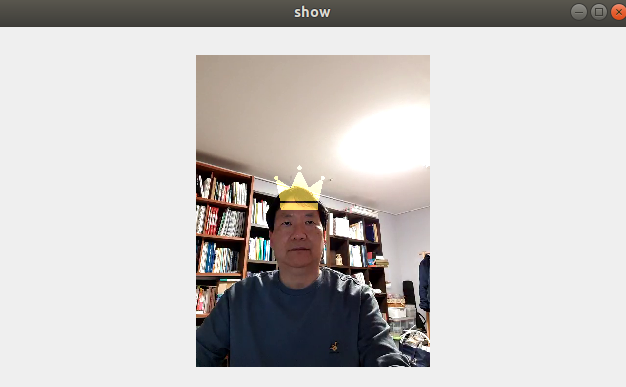

### 2. 스티커앱이 얼굴을 찾지 못하는 거리

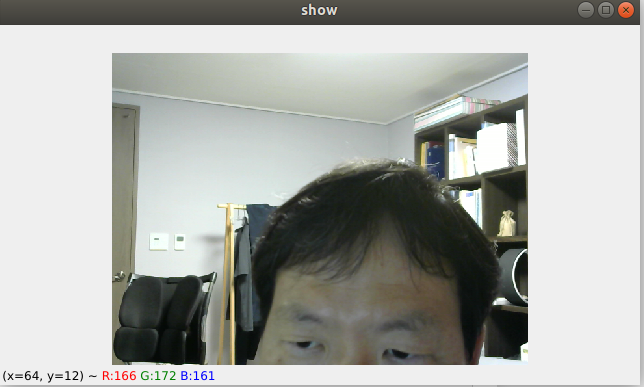

* **스티커가 사라지는 거리 :** 
  - **최소 거리: 33cm**
  - **최대 거리: 2m 60cm**


### 3.  몇 도까지 정상적으로 스티커앱이 동작하는지 기록

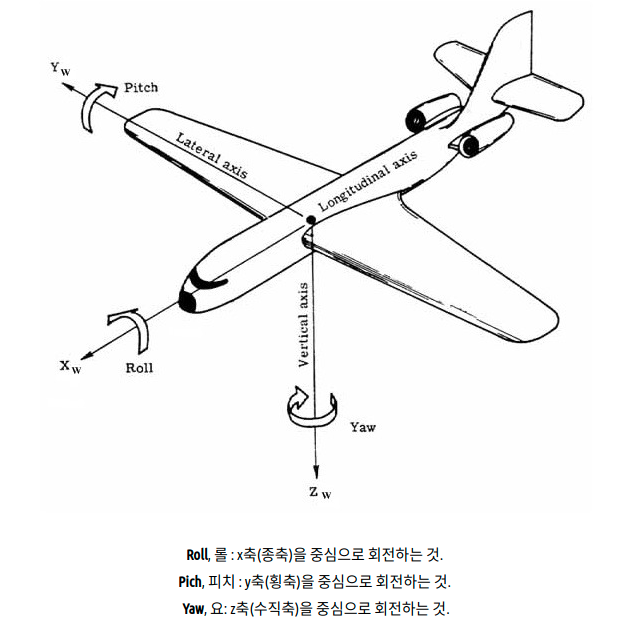
<div style='text-align:center'> Pitch, Roll, Yaw : https://happy8earth.tistory.com/492 </div>

* **yaw** : Vertical axis (yaw) → 높이 축  : 45도
* **picth** : Transverse axis (pitch) → 좌우 축 :
* **roll** : Longitudinal axis (roll) → 거리 축 : 

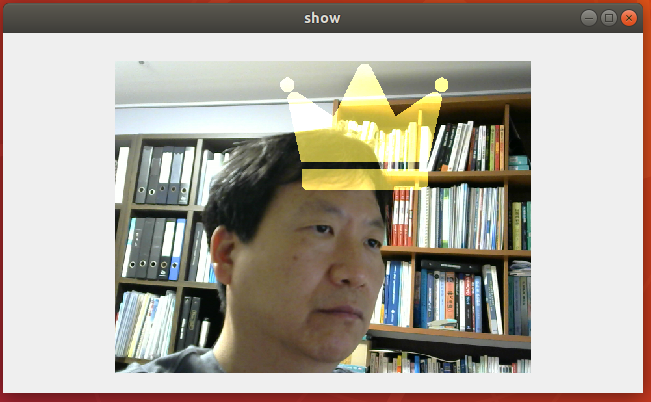
<div style='text-align:center'> yaw</div> 

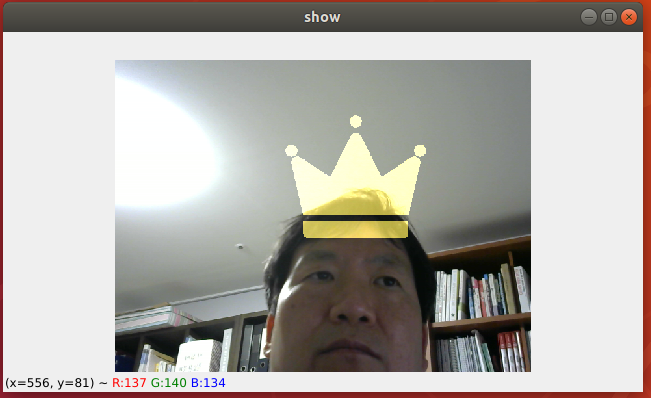
<div style='text-align:center'> picth</div>  

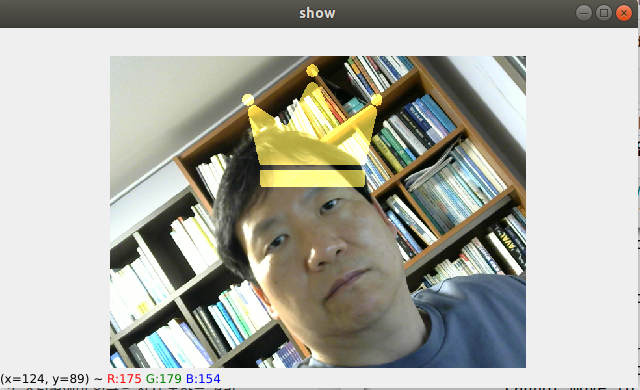
<div style='text-align:center'> roll</div>

### 4. 만들고 싶은 스티커앱의 스펙(허용 거리, 허용 인원 수, 허용 각도, 안정성)을 정해주세요.
(예시)

* 거리 : 50cm ~ 1.5m : 팔 길이(50cm) 또는 셀카봉 길이(1m) 고려함
* 인원 수 : 1~4명 : 4인 가족 기준
* 허용 각도 : pitch : -20 ~ 30도, yaw : -45 ~ 45도, roll : -45 ~ 45도 :
  - 1인의 어깨거리를 약 60cm 잡고, 4인이 1.5m 거리에서 셀카봉으로 찍는 경우에 yaw의 각도는 약 40도 나온다.
* 안정성 : 위 조건을 만족하면서 **FPPI (false positive per image)** 기준 < 0.003, **MR (miss rate)** < 1 300장당 1번 에러 = 10초=30*10에 1번 에러



## 14-4. 프로젝트 (3) 스티커 Out Bound 예외처리 하기


### 1. 지금까지 만든 스티커앱을 이용해서 예외 상황을 찾아주세요. 

* 실행하던 것이 갑자기 프로그램을 빠져 나간다.
* 일정 시간이 지나면 프로그램이 꺼진다.
* 거울에 비친 모습은 잘 찾지 못한다.

### 2. 문제가 어디에서 발생하는지 코드에서 확인합니다.
(힌트) 얼굴이 카메라 왼쪽 경계를 벗어나서 detection 되는 경우 **refined_x** 의 값이 음수가 됩니다.

### 3. Out bound 오류(경계 밖으로 대상이 나가서 생기는 오류)를 해결해 주세요.
위 예외처리 코드 부분에 들어가야 하는 코드는 아래와 같습니다. `newaddsticker.py` 파일을 수정해 주세요.


### 4. 다른 예외는 어떤 것들이 있는지 정의해 주세요. 어떤 것이 문제가 되는지 스스로 정해봅시다.
꼼꼼이 찾아보면 위에서 수정한 것과 같은 명백한 오류 발생 케이스 이외에도 다양한 예외 상황을 찾아볼 수 있을 것입니다.

정확한 정답은 없습니다. 본인이 정의하기 나름입니다.
저는 '고개를 왼쪽아래로 향하게 할 때 스티커의 모양이 일정한 것' 을 예외 상황이라고 정의했습니다.

## 14-5. 프로젝트 (4) 스티커앱 분석 - 거리, 인원 수, 각도, 시계열 안정성


### 1. 멀어지는 경우에 왜 스티커앱이 동작하지 않는지 분석해주세요. 
**detection, landmark, blending 단계 중 무엇이 문제일까요?**
**dlib detection** 이 문제입니다. 멀어지면 `detector_hog` 단계에서 bbox 가 출력되지 않습니다.
```python
    # preprocess
    img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    # detector
    img_rgb_vga = cv2.resize(img_rgb, (640, 360))
    dlib_rects = detector_hog(img_rgb_vga, 0)
    if len(dlib_rects) < 1:
        return img_orig
```

### 2. detector_hog의 문제를 해결하기 위해, 이미지 피라미드를 조절하여 성능을 향상시키는 간단한 방법이 있습니다. 이 방법을 활용하여 img2sticker 메소드를 간단히 고쳐 봅시다.

```python
def img2sticker(img_orig, img_sticker, detector_hog, landmark_predictor):
    # preprocess
    img_rgb = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

    # detector
    img_rgb_vga = cv2.resize(img_rgb, (640, 360))
    dlib_rects = detector_hog(img_rgb_vga, 1) # <- 이미지 피라미드 수 변경
    if len(dlib_rects) < 1:
        return img_orig

    # landmark
    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb_vga, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)
```

수정 후에 `webcam_sticker.py` 를 다시한번 실행하여 스티커앱이 잘 실행되는지 확인해 봅시다.

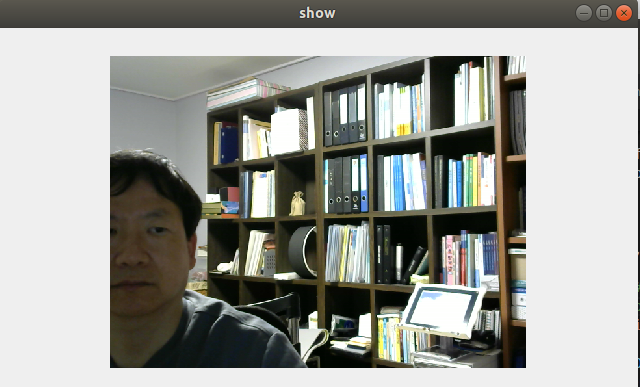
<div style='text-align:center'>detector_hog의 문제 수정 전 </div>

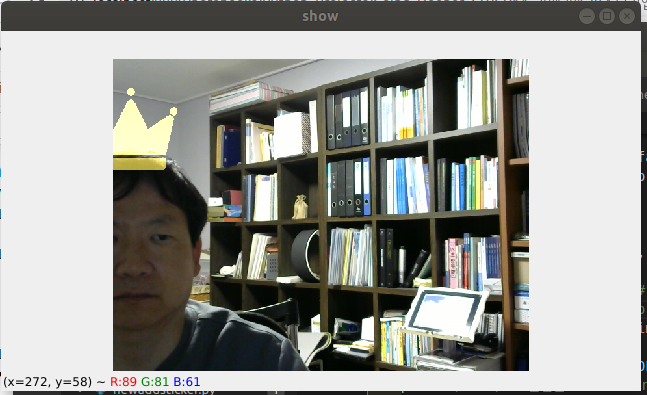
<div style='text-align:center'>detector_hog의 문제 수정 후 </div>

### 3. 위에서 새롭게 시도한 방법의 문제점은 무엇인가요?
속도가 현저히 느려집니다. 기존 30ms/frame 에서 120ms/frame 으로 약 4배 느려짐 → 실시간 구동이 불가능 합니다.

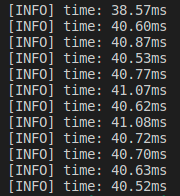
<div style='text-align:center'>detector_hog의 문제 수정 전 </div>

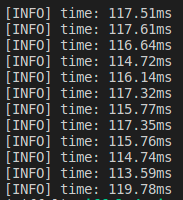
<div style='text-align:center'>detector_hog의 문제 수정 후 </div>

### 4. 실행시간을 만족할 수 있는 방법을 찾아봅시다.
**hog 디텍터**를 **딥러닝 기반 디텍터로 변경**할 수 있습니다. hog 학습 단계에서 다양한 각도에 대한 hog 특징을 모두 추출해서 일반화 하기 어렵기 때문에 딥러닝 기반 검출기의 성능이 훨씬 좋습니다.

딥러닝 기반 detection 방법을 조사합니다. 아래 링크를 참고하면 도움이 될 것입니다.
[How does the OpenCV deep learning face detector work?](https://www.pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/)

opencv 는 intel cpu 을 사용할 때 dnn 모듈이 가속화를 지원하고 있습니다. 따라서 mobilenet 과 같은 작은 backbone 모델을 사용하고 ssd 를 사용한다면 충분히 만족할 만한 시간과 성능을 얻을 수 있습니다.


* [Face Detection With Deep Learning](https://machinelearningmastery.com/how-to-perform-face-detection-with-classical-and-deep-learning-methods-in-python-with-keras/)

### 5. 인원 수, 각도 등 각 문제에 대해서 1 - 4번을 반복해주세요. (정해진 답은 없습니다.)
자유롭게 설계해주세요. 각도 문제에 대해서는 아래 방법을 적용해볼 수 있습니다.

[Facial Landmark Detection](https://learnopencv.com/facial-landmark-detection/)

## 14-6. 프로젝트 (5) 칼만 필터 적용하기


### 1. 카메라 앞에서 가만히 있을 때 스티커의 움직임을 관찰해 주세요. 어떤 문제가 발생하나요?
가만히 있어도 스티커의 크기가 일정하게 유지되지 않고, 떨리는 것처럼 보이는 현상이 발생합니다.


### 2. 이론 강의에서 배운 칼만 필터를 적용해서 스티커 움직임을 안정화시켜 주세요.
칼만 필터를 구현한 모듈인 **kalman.py**와 이를 이용하여 tracker를 구현한 **kpkf.py**를 이용하여 칼만필터를 적용한 **webcam_sticker_kf.py**를 함께 첨부합니다.   
실행해 보면 현재는 웹캠이 아니라 샘플 동영상에 칼만필터가 적용된 것을 확인하실 수 있습니다.

동영상 입력을 웹캠으로 바꾸면 우리가 만들고 있는 웹캠에도 동일하게 적용할 수 있습니다.   
**webcam_sticker_kf.py**를 참고하여 자신만의 **webcam_sticker.py**를 완성해 주세요.

수고많으셨습니다. 지금까지 작성하셨던 주피터 노트북 파일과 파이썬 모듈(*.py)를 포함하여 제출해 주세요.

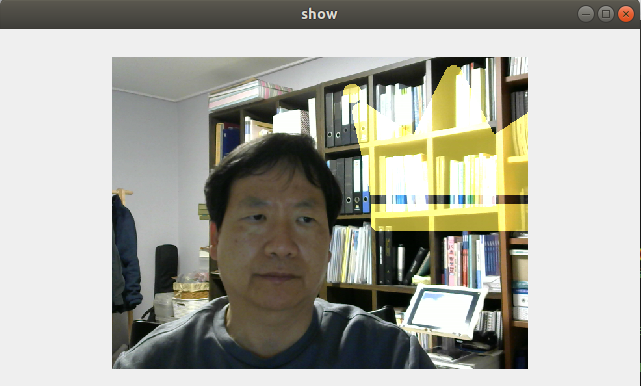
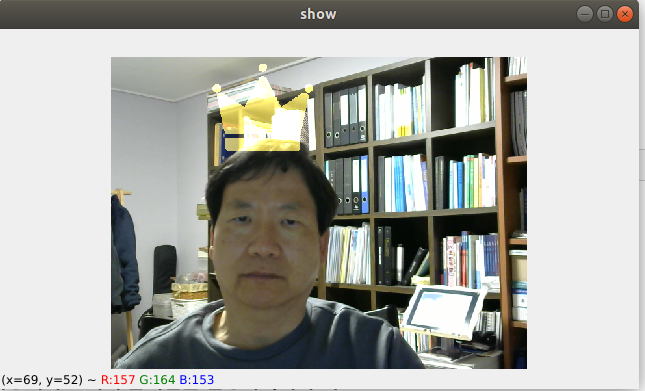

* **kfaddsticker.py**에서 수정한 부분  
  - 60번째줄:   
    - 원본 : y = landmark[30][1]   
    - 수정 : y = landmark[30][1] <span style='color:red'>- dlib_rect.width()//2 </span>
        
  - 64번째줄:  
    - 원본 : x,y,w,h = [ele*2 for ele in [x,y,w,h]]  
    - 수정 : x,y,w,h = [ele*<span style='color:red'>1</span> for ele in [x,y,w,h]]
        
  - 80번째줄:   
    - 원본 : refined_y = y - h <span style='color:red'>- dlib_rect.width()//2</span>  
    - 수정 : refined_y = y - h 
    
  
* **webcam_sticker.py**에서 수정한 부분  
  - 5번줄째 :  
    - 원본 : from newaddsticker import img2sticker
    - 수정 : <span style='color:red'>from kfaddsticker import img2sticker_kf</span> 

## 회고

* yaw, pitch, roll에 대한 축의 개념을 설명하는 곳에서 혼란 스러웠다.
  - Vertical axis (yaw)
  - Transverse axis (pitch)
  - Longitudinal axis (roll)

* hog 디텍터를 딥러닝 기반 디텍터로 변경하는 것에 대해서 시도해보자